In [ ]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, auc, roc_curve, confusion_matrix

from step1 import get_data, print_evaluation_metrics, plot_most_important_features, plot_odds_ratio

## Data Preparation

In [ ]:
X_encoded, y, y_proba = get_data()

/Users/joaosilva/Current/HEC/Interpretability Stability and Algorithmic Fairness/explainable-credit-scoring/step1/step1.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.6876349  -1.6876349  -1.6876349  ...  0.89960459  0.89960459
  0.89960459]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_encoded.loc[:, numerical] = StandardScaler().fit_transform(X_encoded[numerical])
/Users/joaosilva/Current/HEC/Interpretability Stability and Algorithmic Fairness/explainable-credit-scoring/step1/step1.py:93: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.6377609  -0.6377609  -0.6377609  ... -0.6377609  -0.6377609
  1.56798575]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_encoded.loc[:, numerical] = StandardScaler().fit_transform(X_encoded[numerical])
/Users/

## Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=3000, random_state=56)
logreg.fit(X_encoded, y)

LogisticRegression(max_iter=3000, random_state=56)

In [4]:
surrogate_preds_proba = logreg.predict_proba(X_encoded)[:, 1] #probs of 1
surrogate_preds = logreg.predict(X_encoded)

### Evaluating the surrogate

In [ ]:
print_evaluation_metrics(y, y_proba, surrogate_preds, surrogate_preds_proba)

AUC: 0.984152433826725
Accuracy score: 0.9905941250336022
Confusion matrix: [[876417   4848]
 [  5369 199602]]
Mean squared error: 0.29304849365993973


### Interpreting the model

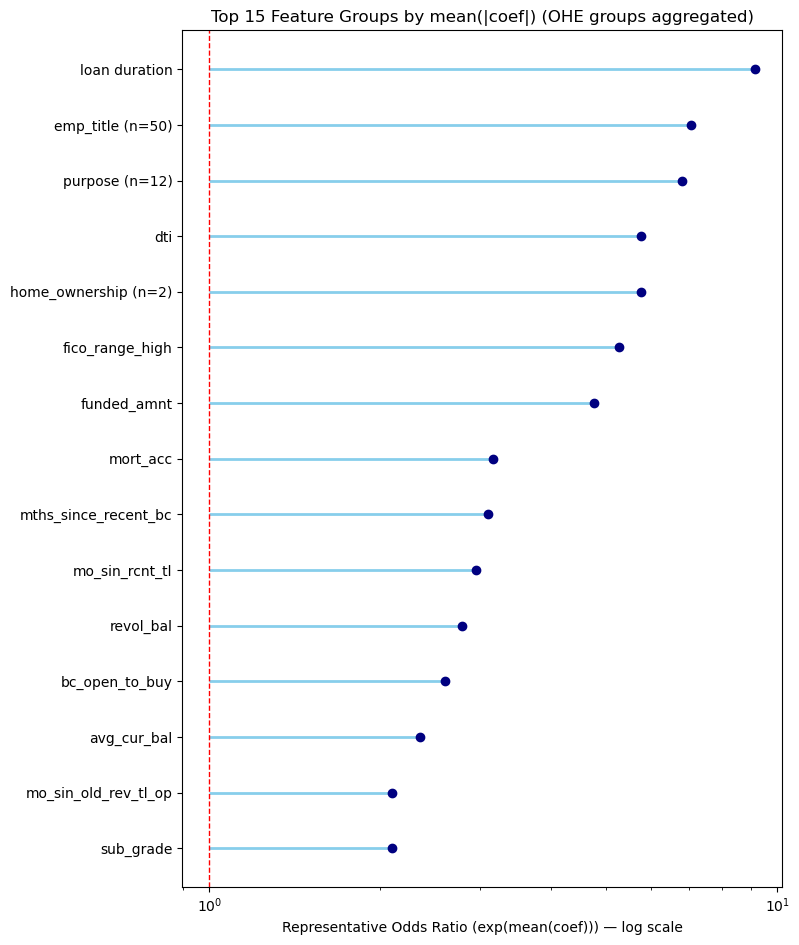

In [ ]:
plot_most_important_features(logreg.coef_[0], X_encoded.columns)

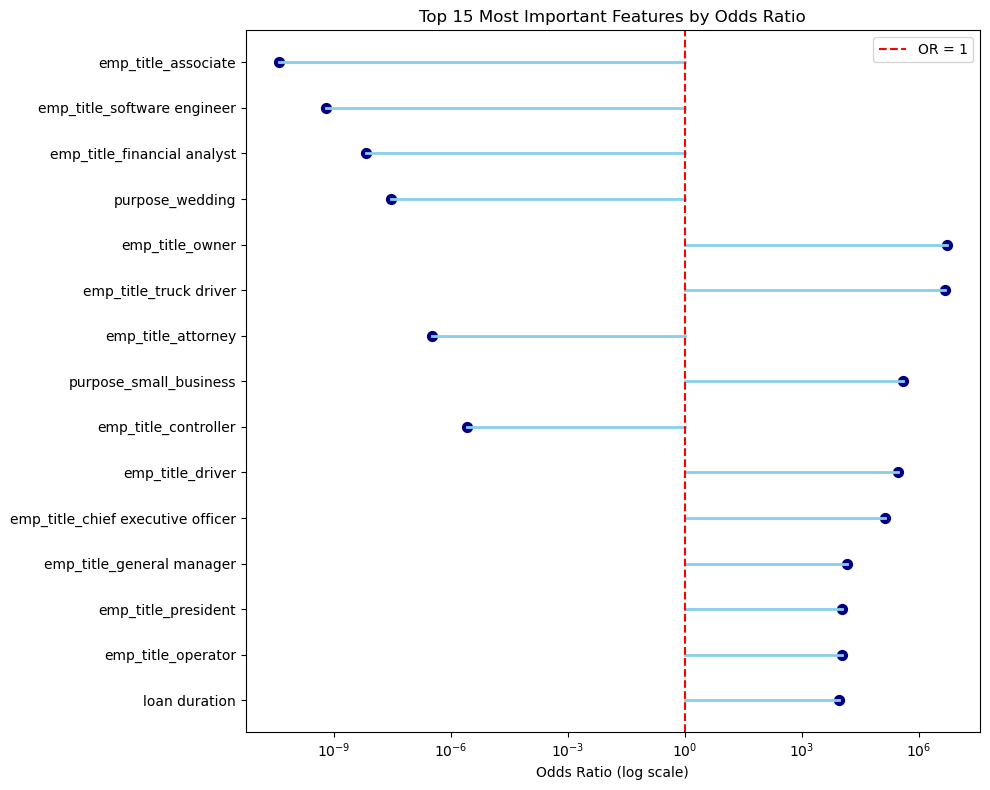

In [ ]:
plot_odds_ratio(logreg.coef_[0], X_encoded.columns)

## Custom PLTR

In [3]:
from step1 import PLTR

### No Adaptive Lasso

In [4]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

pltr = PLTR(k=5, random_state=5, feature_names=X_encoded.columns)
pltr.fit(X_encoded, y, adaptive_lasso=False)

PLTR(feature_names=Index(['issue_d', 'loan duration', 'annual_inc', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_2yrs', 'dti', 'fico_range_high',
       'funded_amnt', 'inq_last_6mths', 'int_rate', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl',
       'num_rev_accts', 'open_acc'...
       'emp_title_president', 'emp_title_program manager',
       'emp_title_project manager', 'emp_title_sales',
       'emp_title_sales manager', 'emp_title_server',
       'emp_title_software engineer', 'emp_title_store manager',
       'emp_title_superintendent', 'emp_title_supervisor', 'emp_title_teacher',
       'emp_title_technician', 'emp_title_truck driver',
       'emp_title_vice president'],
      dtype='object'),
     random_state=5)

In [5]:
pltr.modified_input_full

,issue_d,loan duration,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,dti,fico_range_high,funded_amnt,...,emp_title_technician,emp_title_truck driver,emp_title_vice president,sub_grade_num > 16.5,sub_grade_num < 16.5xloan duration > 0.47,sub_grade_num < 16.5xsub_grade_num > 13.5,sub_grade_num < 16.5xgrade_num > 4.5,grade_num > 3.5,grade_num < 3.5xloan duration > 0.47,sub_grade_num < 16.5xsub_grade_num > 20.5
0,-1.687635,-0.637761,-0.740512,-0.745082,0.749479,-1.586997,-0.370384,-1.880644,2.106130,-1.180039,...,False,False,False,0,0,0,0,0,0,0
1,-1.687635,-0.637761,-0.470965,-0.250508,0.416937,-0.242629,-0.370384,0.530276,1.258044,1.180387,...,False,False,False,0,0,0,0,0,0,0
2,-1.687635,-0.637761,4.254853,2.390279,0.248935,0.226833,-0.370384,0.019227,1.766896,1.281169,...,False,False,False,0,0,0,0,0,0,0
3,-1.687635,-0.637761,0.841762,1.367198,-0.426078,1.147974,-0.370384,-0.633779,0.749193,-0.416216,...,False,False,False,0,0,0,0,0,0,0
4,-1.687635,1.567986,-0.155910,0.630499,-0.342077,0.497129,0.729341,0.561034,-0.946979,1.238734,...,False,False,False,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086231,0.899605,1.567986,0.316671,0.886934,0.584482,-1.654571,-0.370384,-1.190965,-0.268510,2.023775,...,False,False,False,0,1,0,0,0,1,0
1086232,0.899605,1.567986,0.439193,-0.494564,0.703429,-1.234901,2.928791,-0.797031,-0.777361,0.856823,...,False,False,False,1,0,0,0,1,0,0
1086233,0.899605,-0.637761,-0.295935,-0.603490,1.054195,-1.284692,0.729341,0.137526,1.088427,-0.628389,...,False,False,False,0,0,0,0,0,0,0
1086234,0.899605,-0.637761,-0.716007,-0.630601,-0.159313,-1.963989,0.729341,0.189577,-0.777361,-1.052735,...,False,False,False,0,0,0,0,0,0,0


In [6]:
pltr_pred = pltr.predict(pltr.modified_input_full)
pltr_pred_prob = pltr.predict_proba(pltr.modified_input_full)[:, 1]

In [9]:
print_evaluation_metrics(y, y_proba, pltr_pred, pltr_pred_prob)

AUC: 0.988054715546114
Accuracy score: 0.9929103804329814
Confusion matrix: [[877611   3654]
 [  4047 200924]]
Mean squared error: 0.29378894801344413


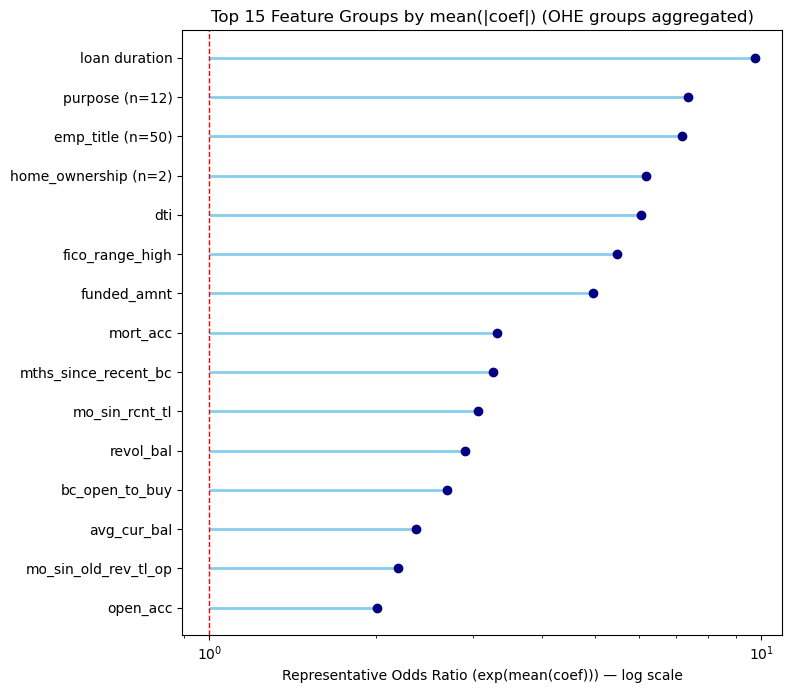

In [10]:
plot_most_important_features(pltr.pltr.coef_[0], pltr.modified_input_full.columns)

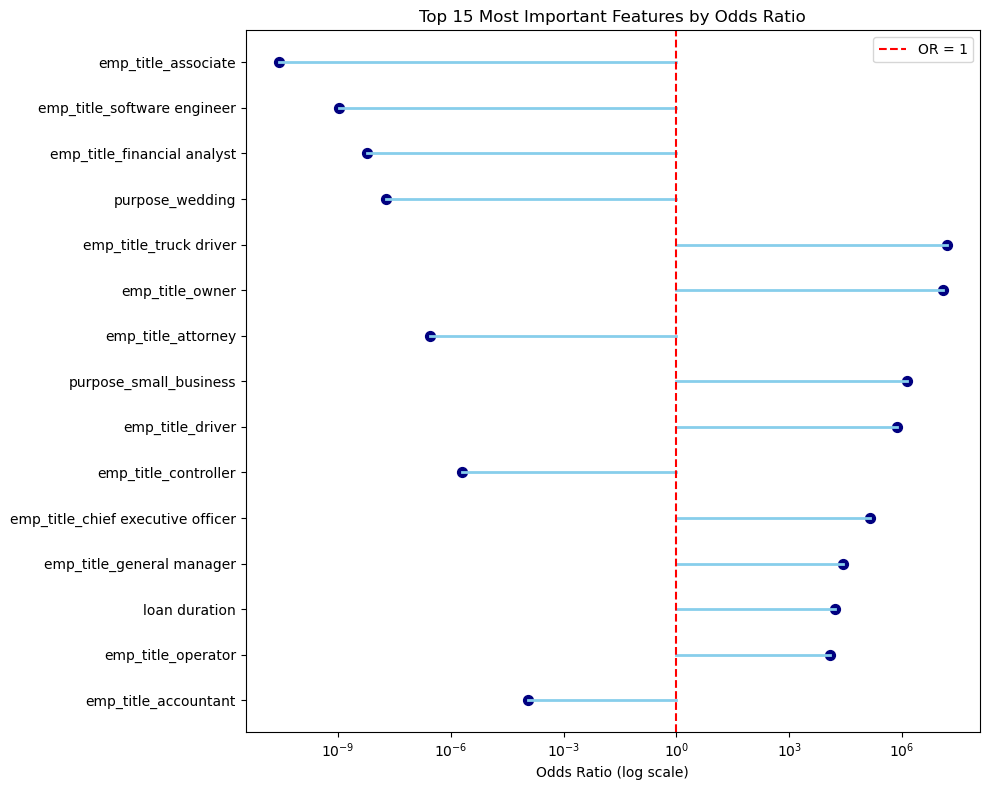

In [11]:
plot_odds_ratio(pltr.pltr.coef_[0], pltr.modified_input_full.columns)

### With Adaptive Lasso

In [12]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

pltr = PLTR(k=5, random_state=10, feature_names=X_encoded.columns)
pltr.fit(X_encoded, y, adaptive_lasso=True)

PLTR(feature_names=Index(['issue_d', 'loan duration', 'annual_inc', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_2yrs', 'dti', 'fico_range_high',
       'funded_amnt', 'inq_last_6mths', 'int_rate', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl',
       'num_rev_accts', 'open_acc'...
       'emp_title_president', 'emp_title_program manager',
       'emp_title_project manager', 'emp_title_sales',
       'emp_title_sales manager', 'emp_title_server',
       'emp_title_software engineer', 'emp_title_store manager',
       'emp_title_superintendent', 'emp_title_supervisor', 'emp_title_teacher',
       'emp_title_technician', 'emp_title_truck driver',
       'emp_title_vice president'],
      dtype='object'),
     random_state=10)

In [13]:
pltr.modified_input_full

,issue_d,loan duration,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,dti,fico_range_high,funded_amnt,...,emp_title_truck driver,emp_title_vice president,sub_grade_num > 16.5,sub_grade_num < 16.5xloan duration > 0.47,grade_num > 3.5,grade_num < 3.5xloan duration > 0.47,sub_grade_num < 16.5xsub_grade_num > 13.5,sub_grade_num < 16.5xsub_grade_num > 20.5,int_rate > 0.76,int_rate < 0.76xloan duration > 0.47
0,-0.103710,-6.121113,-1.206200,-1.716928,2.010467,-1.881517,-0.479349,-11.209410,11.389656,-5.763547,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000
1,-0.103710,-6.121113,-0.767142,-0.577257,1.118427,-0.287657,-0.479349,3.160664,6.803327,5.765244,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000
2,-0.103710,-6.121113,6.930618,5.508038,0.667764,0.268930,-0.479349,0.114603,9.555125,6.257485,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000
3,-0.103710,-6.121113,1.371125,3.150501,-1.142948,1.361019,-0.479349,-3.777586,4.051530,-2.032882,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000
4,-0.103710,15.049243,-0.253958,1.452891,-0.917617,0.589388,0.943910,3.343992,-5.121127,6.050226,...,0.0,0.0,5.255593,0.000000,0.14587,0.000000,0.0,0.0,0.095991,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086231,0.055283,15.049243,0.515818,2.043805,1.567864,-1.961632,-0.479349,-7.098638,-1.452064,9.884520,...,0.0,0.0,0.000000,0.186412,0.00000,0.081965,0.0,0.0,0.000000,0.122719
1086232,0.055283,15.049243,0.715389,-1.139649,1.886937,-1.464078,3.790428,-4.750633,-4.203861,4.184893,...,0.0,0.0,5.255593,0.000000,0.14587,0.000000,0.0,0.0,0.095991,0.000000
1086233,0.055283,-6.121113,-0.482040,-1.390652,2.827863,-1.523109,0.943910,0.819710,5.886062,-3.069178,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000
1086234,0.055283,-6.121113,-1.166285,-1.453125,-0.427354,-2.328473,0.943910,1.129957,-4.203861,-5.141769,...,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000


In [14]:
pltr_pred = pltr.predict(pltr.modified_input_full)
pltr_pred_prob = pltr.predict_proba(pltr.modified_input_full)[:, 1]

In [15]:
print_evaluation_metrics(y, y_proba, pltr_pred, pltr_pred_prob)

AUC: 0.9886926440689751
Accuracy score: 0.993201293273285
Confusion matrix: [[877682   3583]
 [  3802 201169]]
Mean squared error: 0.29778801010317163


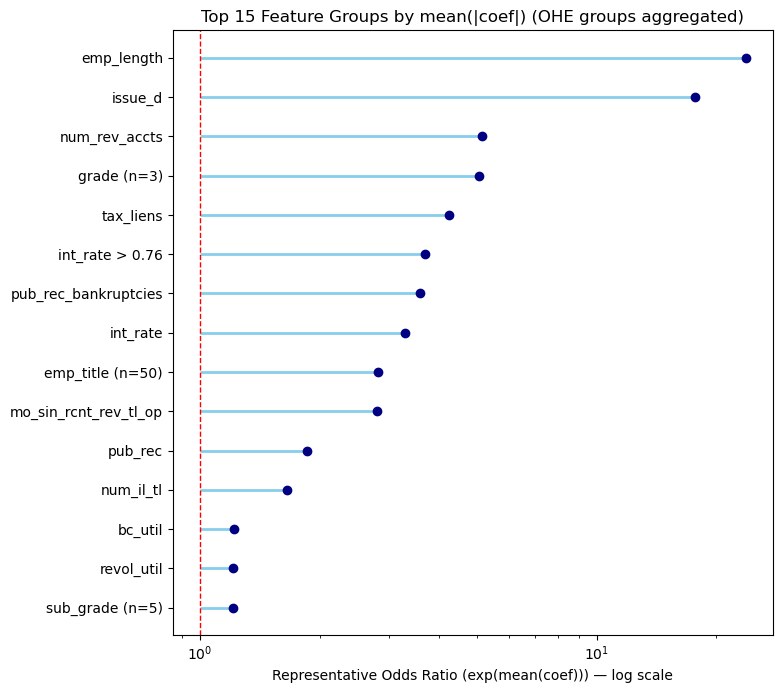

In [16]:
plot_most_important_features(pltr.pltr.coef_[0] * pltr.weights_alasso, pltr.modified_input_full.columns)

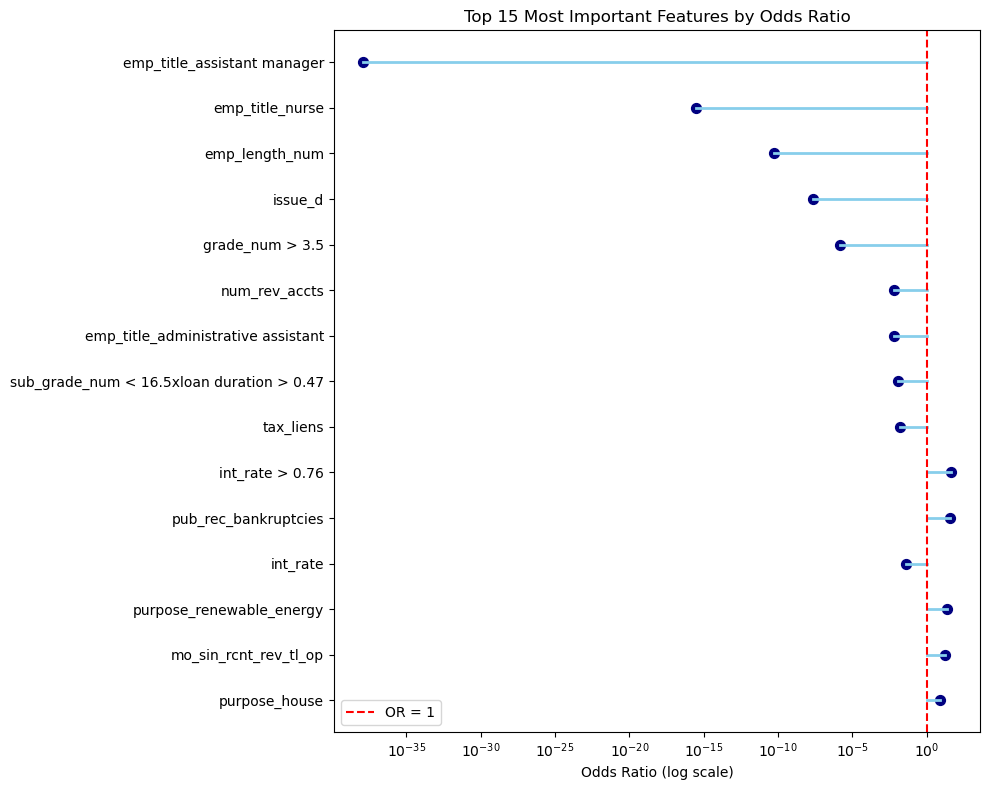

In [17]:
plot_odds_ratio(pltr.pltr.coef_[0] * pltr.weights_alasso, pltr.modified_input_full.columns)